# I. Lý thuyết

**1A 2B 3C 4B 5D**

1) Transfer Learning thường được thực hiện trên hai dữ liệu nguồn (huấn luyện mô hình nguồn) và dữ liệu đích (huấn luyện mô hình đích) thế nào ?


A. Dữ liệu nguồn và dữ liệu đích có sự liên quan tới nhau. Những đặc trưng trong dữ liệu đích xuất hiện ở những dữ liệu nguồn.

B. Dữ liệu nguồn có số lượng classes lớn hơn dữ liệu đích.

C. Kích thước của dữ liệu nguồn rất nhỏ.

D. Dữ liệu đích ít liên quan tới dữ liệu nguồn.


2) Khi nào thì chúng ta nên thực hiện fine tuning trên toàn bộ các layers của mô hình đích ?

A. Khi hai dữ liệu nguồn và đích có mức độ tương đồng cao và dữ liệu đích có kích thước lớn.

B. Khi hai dữ liệu nguồn và đích có mức độ tương đồng cao và dữ liệu đích có kích thước nhỏ.

C. Dữ liệu đích có kích thước nhỏ và dữ liệu mục tiêu có kích thước lớn.

D. Cả hai dữ liệu đích và mục tiêu đều có kích thước nhỏ.


3) Các phương pháp augmentation nào sẽ kết hợp nội dung từ hai ảnh lẫn nhau và tạo ra một nhãn mềm (_soft label_) cho ảnh?

A. Rotation, Random Crop, MixUp

B. Bright Constrast, Color Shift, Addition Noise

C. CutMix, MixUp

D. Flip, Information Loss 


4) Quá trình xây dựng một mô hình AI trong dự án là một chu trình Machine Learning Cycle kế hợp giữa huấn luyện và gán nhãn dữ liệu. Để tiết kiệm chi phí gán nhãn chúng ta nên sử dụng phương pháp nào ?

A. Lấy mẫu ngẫu nhiên từ tập unlabeled dataset để thực hiện gán nhãn.

B. Sử dụng Active Learning để lựa chọn mẫu mang lại thông tin giúp cải thiện nhiều nhất cho hiệu suất mô hình.

C. Lựa chọn mô hình pretrained lớn nhất có thể.

D. Chỉ lựa các dữ liệu có thông tin rõ ràng, có thể phân biệt được bởi con người.

5) Mô hình lớn thường đạt độ chính xác cao nhưng không deploy được trên các thiết bị edge device, IoT,... Trong khi mô hình nhỏ có thể deploy được nhưng thường có độ chính xác thấp. Phương pháp nào có thể giúp mô hình nhỏ cải thiện được độ chính xác ? Có thể lựa chọn nhiều đáp án.

A. Sử dụng active learning để lựa chọn các mẫu đại diện cho tổng thể để huấn luyện mô hình nhỏ.

B. Áp dụng augmentation để huấn luyện mô hình nhỏ.

C. Fine tuning các layers của mô hình lớn sang mô hình nhỏ.

D. Sử dụng knowledge distillation để chuyển giao tri thức từ mô hình lớn sang mô hình nhỏ.

# II. Thực hành

6) Từ bộ dữ liệu [Dog and Cat](https://www.kaggle.com/c/dog-vs-cat-classification/data), hãy huấn luyện một mô hình large (chẳng hạn ResNet50) bằng cách fine-tuning lại các trọng số từ pretrained model của bộ dữ liệu ImageNet. Huấn luyện trên 5 epochs.

7) Hãy huấn luyện một mô hình small (chẳng hạn MobileNetV3) không sử dụng pretrained model trên 1 epochs.

8) Sử dụng mô hình large làm teacher để cải thiện mô hình small là student theo phương pháp knowledge distillation.

9) Áp dụng thêm các kĩ thuật data augmentation kết hợp ảnh khác nhãn để tạo thành nhãn mềm và huấn luyện cải thiện tiếp model student.

10) Giả định cần huấn luyện tiếp mô hình student với các dữ liệu mới chưa được gán nhãn. Hãy xây dựng một kĩ thuật lựa chọn mẫu dựa trên đánh giá uncertainty.

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Colab Notebooks/dog-cat"
# OS.chdir(path)
%cd {path}

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/dog-cat


In [ ]:
# Import PyTorch libraries
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torch.nn.functional as F

# Other libraries we'll use
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

print("Libraries imported - ready to use PyTorch", torch.__version__)

Libraries imported - ready to use PyTorch 1.10.0+cu111


2 classes:
['cats', 'dogs']


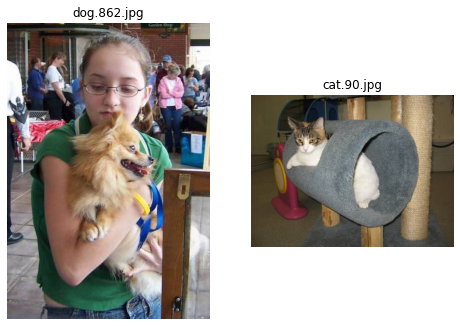

In [ ]:

data_path = '/content/drive/MyDrive/Colab Notebooks/dog-cat/train/train'
# Get the class names
classes = os.listdir(data_path)
classes.sort()
print(len(classes), 'classes:')
print(classes)

# Show the first image in each folder
fig = plt.figure(figsize=(8, 12))
i = 0
for sub_dir in os.listdir(data_path):
    i+=1
    img_file = os.listdir(os.path.join(data_path,sub_dir))[0]
    img_path = os.path.join(data_path, sub_dir, img_file)
    img = mpimg.imread(img_path)
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(img_file)
plt.show()

In [ ]:
import os
import zipfile
import glob
import time
import pickle
import pprint
import math

%matplotlib inline
import matplotlib.pyplot as plt
import PIL

import numpy as np
import pandas as pd
import sklearn.model_selection

import torch
import torch.nn as nn
import torch
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torch.utils.data
from torch.utils.data import Dataset, DataLoader

import tqdm
import random
import torchvision.transforms as T

from sklearn.model_selection import train_test_split

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
SEED = 1234
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
print(device)

cpu


# PREPARE DATASET

In [ ]:
TRAIN_DIR = '/content/drive/MyDrive/Colab Notebooks/dog-cat/train/train'
TEST_DIR = '/content/drive/MyDrive/Colab Notebooks/dog-cat/test'
train_images = glob.glob(TRAIN_DIR+"/**/**.jpg")
test_images = glob.glob(TEST_DIR+"/**.jpg")

In [ ]:
dogs_list = [img for img in train_images if img.split("/")[-2] == "dogs"]
cats_list = [img for img in train_images if img.split("/")[-2] == "cats"]

print("Dogs Images: ",len(dogs_list))
print("Cats Images: ",len(cats_list))

class_to_int = {"dogs" : 0, "cats" : 1}
int_to_class = {0 : "dogs", 1 : "cats"}

Dogs Images:  12510
Cats Images:  12734


In [ ]:
from PIL import Image
class CatDogDataset(Dataset):
    def __init__(self, imgs, class_to_int, mode = "train", 
                 transforms = None):
        super().__init__()
        self.imgs = imgs
        self.class_to_int = class_to_int
        self.mode = mode
        self.transforms = transforms
    def __getitem__(self, idx):
        image_name = self.imgs[idx]
        if self.mode == "train" or self.mode == "val":
            img = Image.open(image_name)
            # img = img.resize((256, 256))
            ### Preparing class label
            label = self.class_to_int[image_name.split("/")[-2]]
            label = torch.tensor(label, dtype = torch.float32)
            ### Apply Transforms on image
            img = self.transforms(img)
            return img, label
        elif self.mode == "test":
            img = Image.open(image_name)
            # img = img.resize((256, 256))
            ### Apply Transforms on image
            img = self.transforms(img)
            return img, image_name
    def __len__(self):
        return len(self.imgs)

In [ ]:
def get_train_transform():
    return T.Compose([
        T.RandomHorizontalFlip(p=0.5), # Random flip with probability = 0.5
        T.RandomRotation(15), # Random rotation with angle <= 15
        # T.ColorJitter(brightness=.5, hue=.3), # Bright contrast
        T.Resize((256, 256)),
        T.RandomResizedCrop(224), # Random crop Image with shape 224
        T.ToTensor(),
        T.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225)), # Normalize according to ImageNet distribution
    ])
    
def get_val_transform():
    return T.Compose([
        T.Resize((224, 224)),
        T.ToTensor(),
        T.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
    ])

In [ ]:
train_imgs, val_imgs = train_test_split(train_images, test_size = 0.2)

In [ ]:
train_dataset = CatDogDataset(train_imgs, class_to_int, mode = "train", 
                              transforms = get_train_transform())
val_dataset = CatDogDataset(val_imgs, class_to_int, mode = "val", 
                            transforms = get_val_transform())
test_dataset = CatDogDataset(test_images, class_to_int, mode = "test", 
                             transforms = get_val_transform())

train_data_loader = DataLoader(
    dataset = train_dataset,
    num_workers = 2,
    batch_size = 32,
    shuffle = True
)

val_data_loader = DataLoader(
    dataset = val_dataset,
    num_workers = 2,
    batch_size = 16,
    shuffle = True
)

test_data_loader = DataLoader(
    dataset = test_dataset,
    num_workers = 2,
    batch_size = 1,
    shuffle = False
)

In [ ]:
def train_one_epoch(train_data_loader, model, optimizer):
    epoch_loss = []
    epoch_acc = []
    start_time = time.time()
    # model.to(device)
    model.train()
    
    for images, labels in train_data_loader:
        
        #Loading images and labels to device
        images = images.to(device)
        labels = labels.to(device)
        labels = labels.reshape((labels.shape[0], 1)) # [N, 1] - to match with preds shape
        
        #Reseting Gradients
        optimizer.zero_grad()
        
        #Forward
        preds = model(images)
        
        #Calculating Loss
        _loss = criterion(preds, labels)
        loss = _loss.item()
        epoch_loss.append(loss)
        
        #Calculating Accuracy
        acc = accuracy(preds, labels)
        epoch_acc.append(acc)
        
        #Backward
        _loss.backward()
        optimizer.step()
    
    ###Overall Epoch Results
    end_time = time.time()
    total_time = end_time - start_time
    
    ###Acc and Loss
    epoch_loss = np.mean(epoch_loss)
    epoch_acc = np.mean(epoch_acc)
    
    ###Storing results to logs
    train_logs["loss"].append(epoch_loss)
    train_logs["accuracy"].append(epoch_acc)
    train_logs["time"].append(total_time)
        
    return epoch_loss, epoch_acc, total_time

In [ ]:
def val_one_epoch(val_data_loader, model, best_val_acc, model_name):
    epoch_loss = []
    epoch_acc = []
    start_time = time.time()
    # model.to(device)
    model.eval()
    
    for images, labels in val_data_loader:
        
        #Loading images and labels to device
        images = images.to(device)
        labels = labels.to(device)
        labels = labels.reshape((labels.shape[0], 1)) # [N, 1] - to match with preds shape
        
        #Forward
        preds = model(images)
        
        #Calculating Loss
        _loss = criterion(preds, labels)
        loss = _loss.item()
        epoch_loss.append(loss)
        
        #Calculating Accuracy
        acc = accuracy(preds, labels)
        epoch_acc.append(acc)
    
    ###Overall Epoch Results
    end_time = time.time()
    total_time = end_time - start_time
    
    ###Acc and Loss
    epoch_loss = np.mean(epoch_loss)
    epoch_acc = np.mean(epoch_acc)
    
    ###Storing results to logs
    val_logs["loss"].append(epoch_loss)
    val_logs["accuracy"].append(epoch_acc)
    val_logs["time"].append(total_time)
    
    ###Saving best model
    if epoch_acc > best_val_acc:
        best_val_acc = epoch_acc
        torch.save(model.state_dict(),model_name+"_best.pth")
        
    return epoch_loss, epoch_acc, total_time, best_val_acc

In [ ]:
def accuracy(preds, trues):
    preds = [1 if preds[i] >= 0.5 else 0 for i in range(len(preds))]
    acc = [1 if preds[i] == trues[i] else 0 for i in range(len(preds))]
    acc = np.sum(acc) / len(preds)
    return (acc * 100)

# Build  model

In [ ]:
class cnn(nn.Module):
    def __init__(self):
        super(cnn,self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 128, kernel_size=7, padding=0, stride=2),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(128,256, kernel_size=5, padding=0, stride=2),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
            )
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(256,512, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )
        
        
        self.fc1 = nn.Linear(2048,1000)
        self.dropout = nn.Dropout()
        self.fc2 = nn.Linear(1000,1)
        self.relu = nn.ReLU()
        self.sigmoid=nn.Sigmoid()
        
        
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0),-1)
        out = self.relu(self.fc1(out))
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

In [ ]:
from torchvision import models
from torchsummary import summary

model=cnn()
model.to(device)

cnn(
  (layer1): Sequential(
    (0): Conv2d(3, 128, kernel_size=(7, 7), stride=(2, 2))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(128, 256, kernel_size=(5, 5), stride=(2, 2))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2))
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2048, out_features=1000, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(i

In [ ]:
# Reset gradient
model.zero_grad()

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

# Learning Rate Scheduler
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size = 10, gamma = 0.33)

#Loss Function
criterion = nn.BCELoss()

# Logs - Helpful for plotting after training finishes
train_logs = {"loss" : [], "accuracy" : [], "time" : []}
val_logs = {"loss" : [], "accuracy" : [], "time" : []}

# Loading model to device
model.to(device)

# No of epochs 
epochs = 5

6) Từ bộ dữ liệu Dog and Cat, hãy huấn luyện một mô hình large (chẳng hạn ResNet50) bằng cách fine-tuning lại các trọng số từ pretrained model của bộ dữ liệu ImageNet. Huấn luyện trên 5 epochs.

# ResNet50

In [ ]:
from torchvision.models import resnet50
resnet_model = resnet50(pretrained = True)

# Modifying Head - classifier

resnet_model.fc = nn.Sequential(
    nn.Linear(2048, 1, bias = True),
    nn.Sigmoid()
)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [ ]:
# resnet_model = Sequential()

# pretrained_model= tf.keras.applications.ResNet50(include_top=False,
#                    input_shape=(224,224,3),
#                    pooling='avg',
#                    weights='imagenet')
# for layer in pretrained_model.layers:
#         layer.trainable=False

# resnet_model.add(pretrained_model)

# resnet_model.add(Flatten())
# resnet_model.add(Dense(512, activation='relu'))
# resnet_model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Optimizer
optimizer = torch.optim.Adam(resnet_model.parameters(), lr = 0.005)

# Learning Rate Scheduler
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size = 5, gamma = 0.5)

#Loss Function
criterion = nn.BCELoss()

# Logs - Helpful for plotting after training finishes
train_logs = {"loss" : [], "accuracy" : [], "time" : []}
val_logs = {"loss" : [], "accuracy" : [], "time" : []}

# Loading model to device
resnet_model.to(device)

# No of epochs 
epochs = 5

**print result RESNET50**

In [ ]:
best_val_acc = 0
for epoch in range(epochs):
    
    ###Training
    loss, acc, _time = train_one_epoch(train_data_loader, resnet_model, optimizer)
    
    #Print Epoch Details
    print("\nTraining")
    print("Epoch {}".format(epoch+1))
    print("Loss : {}".format(round(loss, 4)))
    print("Acc : {}".format(round(acc, 4)))
    print("Time : {}".format(round(_time, 4)))
    
    ###Validation
    loss, acc, _time, best_val_acc = val_one_epoch(val_data_loader, resnet_model, best_val_acc, "resnet50")
    
    #Print Epoch Details
    print("\nValidating")
    print("Epoch {}".format(epoch+1))
    print("Loss : {}".format(round(loss, 4)))
    print("Acc : {}".format(round(acc, 4)))
    print("Time : {}".format(round(_time, 4)))
    

KeyboardInterrupt: ignored

# MobileNetV3

7. Hãy huấn luyện một mô hình small (chẳng hạn MobileNetV3) không sử dụng pretrained model trên 1 epochs.

In [ ]:
# from torchvision.models import mobilenet_v3
# model = mobilenet_v3(pretrained = True)

import torchvision.models as models
mobilenet_v3_small = models.mobilenet_v3_small(pretrained=False)

# Modifying Head - classifier. This will freeze all the parameters except of the classifier. Assuming you want to train only the classifier, 
#you can freeze the parameters you don't want to change
for name, param in mobilenet_v3_small.named_parameters() :
    param.requires_grad = False
    if name.startswith('classifier') : 
        param.requires_grad = True

mobilenet_v3_small.classifier._modules['1']  = nn.Sequential(
    nn.Linear(1280, 1, bias = True),
    nn.Sigmoid()
)

In [ ]:
# model.classifier[1]
mobilenet_v3_small.classifier[1]

# mobilenet_v3_small.summary()

Sequential(
  (0): Linear(in_features=1280, out_features=1, bias=True)
  (1): Sigmoid()
)

In [ ]:
# Xavier initialize
for layer in mobilenet_v3_small.classifier[1]:
  if isinstance(layer, nn.modules.linear.Linear):
    nn.init.xavier_uniform_(layer.weight)

In [ ]:
#Loss Function
criterion = nn.BCELoss()

# Logs - Helpful for plotting after training finishes
train_logs = {"loss" : [], "accuracy" : [], "time" : []}
val_logs = {"loss" : [], "accuracy" : [], "time" : []}

# setup device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Loading model to device
mobilenet_v3_small.to(device)

# No of epochs 
warm_up_epochs = 5
epochs = 1

In [ ]:
# Optimizer
learning_rate = 0.00001
optimizer = torch.optim.Adam(mobilenet_v3_small.parameters(), lr = learning_rate)

# Learning Rate Scheduler
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size = 5, gamma = 0.5)

params_1x = [param for name, param in mobilenet_v3_small.named_parameters()
             if name not in ["classifier.1.0.weight", "classifier.1.0.bias"]]
trainer = torch.optim.SGD([{'params': params_1x},
                            {'params': mobilenet_v3_small.classifier.parameters(), 'lr': learning_rate * 10}],
                        lr=learning_rate, weight_decay=0.001)

ValueError: ignored

**print result MOBILENETv3**

In [ ]:
best_val_acc = 0
for epoch in range(epochs):
    ###Training
    loss, acc, _time = train_one_epoch(train_data_loader, mobilenet_v3_small, optimizer)
    
    #Print Epoch Details
    print("\nTraining")
    print("Epoch {}".format(epoch+1))
    print("Loss : {}".format(round(loss, 4)))
    print("Acc : {}".format(round(acc, 4)))
    print("Time : {}".format(round(_time, 4)))
    
    ###Validation
    loss, acc, _time, best_val_acc = val_one_epoch(val_data_loader, mobilenet_v3_small, best_val_acc, "mobilenet_v3")
    
    #Print Epoch Details
    print("\nValidating")
    print("Epoch {}".format(epoch+1))
    print("Loss : {}".format(round(loss, 4)))
    print("Acc : {}".format(round(acc, 4)))
    print("Time : {}".format(round(_time, 4)))

KeyboardInterrupt: ignored

# Predict

In [ ]:
model_file_1="resnet50_best.pth"
model1_name= model_file_1.split(".")[0]
# model=mobilenet_v2(pretrained=False)
# model.classifier._modules['1'] = nn.Sequential(
#     nn.Linear(1280, 1, bias = True),
#     nn.Sigmoid()
# )
# resnet_model = resnet50(pretrained = True)
# resnet_model.fc = nn.Sequential(
#     nn.Linear(2048, 1, bias = True),
#     nn.Sigmoid()
# )
### RESTNET50
resnet_model.load_state_dict(torch.load(model_file_1))
resnet_model.to(device)
resnet_model.eval()  # ensure we're in eval mode

test_predictions = []
test_idx = []
print('Testing...')
for X,id_ in test_data_loader:
    with torch.no_grad():
        X = X.to(device)
        predictions = resnet_model(X)
        test_idx.extend(list(id_))
        test_predictions.extend([1 if predictions[i] < 0.5 else 0 for i in range(len(predictions))])  

submission = pd.DataFrame({'id': test_idx, 'labels': test_predictions}).sort_values(by='id')
submission.to_csv(f'submission_'+model1_name+'.csv', index=False)
print(f'Submission saved')

FileNotFoundError: ignored

In [ ]:
model_file_2="mobilenet_v3_small.pth"
model2_name= model_file_2.split(".")[0]
# model=mobilenet_v2(pretrained=False)
# model.classifier._modules['1'] = nn.Sequential(
#     nn.Linear(1280, 1, bias = True),
#     nn.Sigmoid()
# )
# resnet_model = resnet50(pretrained = True)
# resnet_model.fc = nn.Sequential(
#     nn.Linear(2048, 1, bias = True),
#     nn.Sigmoid()
# )
### MOBILENETV3
mobilenet_v3_small.load_state_dict(torch.load(model_file_2))
mobilenet_v3_small.to(device)
mobilenet_v3_small.eval()  # ensure we're in eval mode

test_predictions = []
test_idx = []
print('Testing...')
for X,id_ in test_data_loader:
    with torch.no_grad():
        X = X.to(device)
        predictions = mobilenet_v3_small(X)
        test_idx.extend(list(id_))
        test_predictions.extend([1 if predictions[i] < 0.5 else 0 for i in range(len(predictions))])  

submission = pd.DataFrame({'id': test_idx, 'labels': test_predictions}).sort_values(by='id')
submission.to_csv(f'submission_'+model2_name+'.csv', index=False)
print(f'Submission saved')

# Knowledge Distillation


Code example: https://colab.research.google.com/drive/1MRWKs1RrY0PdNR6CxhINdJGjEfB_Qy6f?usp=sharing


8. Sử dụng mô hình large làm teacher để cải thiện mô hình small là student theo phương pháp knowledge distillation.

We use RestNet50 for teacher and MobileNetV3-small as student

Check what model is using

In [ ]:
print(resnet_model) 

# seem like we are still at MobilenetV2 , need to change

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

# *Teacher Model*

In [ ]:
# Since the teacher model is not going to be trained further we make
# it non-trainable.
teacher_model = resnet_model
teacher_model.trainable = False
# teacher_model.summary()

In [ ]:
from tensorflow import keras
import tensorflow_addons as tfa
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np

import tensorflow_datasets as tfds

tfds.disable_progress_bar()

**Hyperparameters and contants**

In [ ]:
try:
    AUTOTUNE = tf.data.AUTOTUNE     
except:
    AUTOTUNE = tf.data.experimental.AUTOTUNE 
BATCH_SIZE = 64

# Comes from Table 4 and "Training setup" section.
TEMPERATURE = 10  # Used to soften the logits before they go to softmax.
INIT_LR = 0.003  # Initial learning rate that will be decayed over the training period.
WEIGHT_DECAY = 0.001  # Used for regularization.
CLIP_THRESHOLD = 1.0  # Used for clipping the gradients by L2-norm.

# We will first resize the training images to a bigger size and then we will take
# random crops of a lower size.
BIGGER = 160
RESIZE = 128

**Data input pipeline**

In [ ]:



def mixup(images, labels):
    alpha = tf.random.uniform([], 0, 1)
    mixedup_images = alpha * images + (1 - alpha) * tf.reverse(images, axis=[0])
    # The labels do not matter here since they are NOT used during
    # training.
    return mixedup_images, labels


def preprocess_image(image, label, train=True):
    image = tf.cast(image, tf.float32) / 255.0

    if train:
        image = tf.image.resize(image, (BIGGER, BIGGER))
        image = tf.image.random_crop(image, (RESIZE, RESIZE, 3))
        image = tf.image.random_flip_left_right(image)
    else:
        # Central fraction amount is from here:
        # https://git.io/J8Kda.
        image = tf.image.central_crop(image, central_fraction=0.875)
        image = tf.image.resize(image, (RESIZE, RESIZE))

    return image, label


def prepare_dataset(dataset, train=True, batch_size=BATCH_SIZE):
    if train:
        dataset = dataset.map(preprocess_image, num_parallel_calls=AUTO)
        dataset = dataset.shuffle(BATCH_SIZE * 10)
    else:
        dataset = dataset.map(
            lambda x, y: (preprocess_image(x, y, train)), num_parallel_calls=AUTO
        )
    dataset = dataset.batch(batch_size)

    if train:
        dataset = dataset.map(mixup, num_parallel_calls=AUTO)

    dataset = dataset.prefetch(AUTO)
    return dataset


In [ ]:
train_ds = train_data_loader
validation_ds = val_data_loader
test_ds =test_data_loader

# **Student Model **

**Student Model **

For the purpose of this example, we will use the MobileNetV3_small

tf.keras.applications.MobileNetV3Small(
    input_shape=None, alpha=1.0, minimalistic=False, include_top=True,
    weights='imagenet', input_tensor=None, classes=1000, pooling=None,
    dropout_rate=0.2, classifier_activation='softmax',
    include_preprocessing=True
)

In [ ]:
def get_teacher():
    teacher = keras.applications.ResNet50V2(
        weights=None,
        input_shape=(RESIZE, RESIZE, 3),
        classes=102,
        classifier_activation="linear",
    )
    return teacher


get_teacher().count_params()


23773798

In [ ]:
# # Create the teacher
# teacher = keras.Sequential(
#     [
#         keras.Input(shape=(28, 28, 1)),
#         layers.Conv2D(256, (3, 3), strides=(2, 2), padding="same"),
#         layers.LeakyReLU(alpha=0.2),
#         layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding="same"),
#         layers.Conv2D(512, (3, 3), strides=(2, 2), padding="same"),
#         layers.Flatten(),
#         layers.Dense(10),
#     ],
#     name="teacher",
# )
# teacher.count_params()

1433610

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
# def get_mobilenetv3_small():
#     mobilenetv3_small = tf.keras.applications.MobileNetV3Small(
#         weights='imagenet',
#         input_shape=(RESIZE, RESIZE, 3),
#         classes=1000,
#         classifier_activation="softmax",
#     )
#     return mobilenetv3_small

# Create the student
student = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(16, (3, 3), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding="same"),
        layers.Conv2D(32, (3, 3), strides=(2, 2), padding="same"),
        layers.Flatten(),
        layers.Dense(10),
    ],
    name="student",
)

# Clone student for later comparison
student_scratch = keras.models.clone_model(student)
student.count_params()

# get_mobilenetv3_small().count_params()

20490

In [ ]:
# print(get_mobilenetv3_small().count_params())

2554968


Teacher ResNet50 V2(23773798) has more utilities than student (20490). 

**Distillation utility**

In [ ]:

class Distiller(tf.keras.Model):
    def __init__(self, student, teacher):
        super(Distiller, self).__init__()
        self.student = student
        self.teacher = teacher
        self.loss_tracker = keras.metrics.Mean(name="distillation_loss")

    @property
    def metrics(self):
        metrics = super().metrics
        metrics.append(self.loss_tracker)
        return metrics

    def compile(
        self, optimizer, metrics, distillation_loss_fn, temperature=TEMPERATURE,
    ):
        super(Distiller, self).compile(optimizer=optimizer, metrics=metrics)
        self.distillation_loss_fn = distillation_loss_fn
        self.temperature = temperature

    def train_step(self, data):
        # Unpack data
        x, _ = data

        # Forward pass of teacher
        teacher_predictions = self.teacher(x, training=False)

        with tf.GradientTape() as tape:
            # Forward pass of student
            student_predictions = self.student(x, training=True)

            # Compute loss
            distillation_loss = self.distillation_loss_fn(
                tf.nn.softmax(teacher_predictions / self.temperature, axis=1),
                tf.nn.softmax(student_predictions / self.temperature, axis=1),
            )

        # Compute gradients
        trainable_vars = self.student.trainable_variables
        gradients = tape.gradient(distillation_loss, trainable_vars)

        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        # Report progress
        self.loss_tracker.update_state(distillation_loss)
        return {"distillation_loss": self.loss_tracker.result()}

    def test_step(self, data):
        # Unpack data
        x, y = data

        # Forward passes
        teacher_predictions = self.teacher(x, training=False)
        student_predictions = self.student(x, training=False)

        # Calculate the loss
        distillation_loss = self.distillation_loss_fn(
            tf.nn.softmax(teacher_predictions / self.temperature, axis=1),
            tf.nn.softmax(student_predictions / self.temperature, axis=1),
        )

        # Report progress
        self.loss_tracker.update_state(distillation_loss)
        self.compiled_metrics.update_state(y, student_predictions)
        results = {m.name: m.result() for m in self.metrics}
        return results


**Learning rate schedule**

A warmup cosine learning rate schedule is used in the paper. This schedule is also typical for many pre-training methods especially for computer vision.

In [ ]:
# Some code is taken from:
# https://www.kaggle.com/ashusma/training-rfcx-tensorflow-tpu-effnet-b2.


class WarmUpCosine(keras.optimizers.schedules.LearningRateSchedule):
    def __init__(
        self, learning_rate_base, total_steps, warmup_learning_rate, warmup_steps
    ):
        super(WarmUpCosine, self).__init__()

        self.learning_rate_base = learning_rate_base
        self.total_steps = total_steps
        self.warmup_learning_rate = warmup_learning_rate
        self.warmup_steps = warmup_steps
        self.pi = tf.constant(np.pi)

    def __call__(self, step):
        if self.total_steps < self.warmup_steps:
            raise ValueError("Total_steps must be larger or equal to warmup_steps.")

        cos_annealed_lr = tf.cos(
            self.pi
            * (tf.cast(step, tf.float32) - self.warmup_steps)
            / float(self.total_steps - self.warmup_steps)
        )
        learning_rate = 0.5 * self.learning_rate_base * (1 + cos_annealed_lr)

        if self.warmup_steps > 0:
            if self.learning_rate_base < self.warmup_learning_rate:
                raise ValueError(
                    "Learning_rate_base must be larger or equal to "
                    "warmup_learning_rate."
                )
            slope = (
                self.learning_rate_base - self.warmup_learning_rate
            ) / self.warmup_steps
            warmup_rate = slope * tf.cast(step, tf.float32) + self.warmup_learning_rate
            learning_rate = tf.where(
                step < self.warmup_steps, warmup_rate, learning_rate
            )
        return tf.where(
            step > self.total_steps, 0.0, learning_rate, name="learning_rate"
        )


We can now plot a a graph of learning rates generated using this schedule.

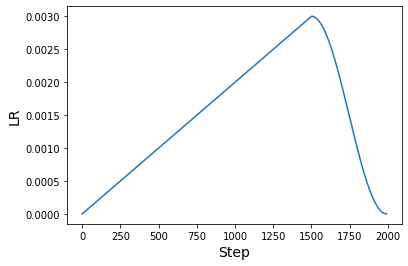

In [ ]:
ARTIFICIAL_EPOCHS = 1000
ARTIFICIAL_BATCH_SIZE = 512
DATASET_NUM_TRAIN_EXAMPLES = 1020
TOTAL_STEPS = int(
    DATASET_NUM_TRAIN_EXAMPLES / ARTIFICIAL_BATCH_SIZE * ARTIFICIAL_EPOCHS
)
scheduled_lrs = WarmUpCosine(
    learning_rate_base=INIT_LR,
    total_steps=TOTAL_STEPS,
    warmup_learning_rate=0.0,
    warmup_steps=1500,
)

lrs = [scheduled_lrs(step) for step in range(TOTAL_STEPS)]
plt.plot(lrs)
plt.xlabel("Step", fontsize=14)
plt.ylabel("LR", fontsize=14)
plt.show()

**Training**

In [ ]:
!pip install tensorflow-addons==0.8.3
!pip install tensorflow==2.2.0-rc3

     |████████████████████████████████| 1.0 MB 5.0 MB/s 
     |████████████████████████████████| 516.2 MB 8.2 kB/s 
     |████████████████████████████████| 2.9 MB 32.8 MB/s 
     |████████████████████████████████| 3.0 MB 25.4 MB/s 
     |████████████████████████████████| 454 kB 47.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Fou

**Load Dataset**

In [ ]:
from tensorflow import keras 
import tensorflow as tf
 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

path = '/content/drive/MyDrive/Colab Notebooks/dog-cat/train/train'
batch_size = 32
epochs = 10
image_size = (224,224)
def get_generator(image_data_generator, directory, train_valid=None, seed=None):
    train_generator = image_data_generator.flow_from_directory(directory, batch_size=batch_size, class_mode='binary', target_size=(224,224), subset=train_valid, seed=seed)    
    return train_generator


def get_ImageDataGenerator(validation_split=None):
    image_generator = ImageDataGenerator(featurewise_center=True,
                                        validation_split=validation_split)
    image_generator.mean = [123.68, 116.779, 103.939]
    return image_generator

image_gen_train = get_ImageDataGenerator(validation_split=0.2)
train_generator = get_generator(image_gen_train, path, train_valid='training', seed=1)
validation_generator = get_generator(image_gen_train, path, train_valid='validation')

Found 20196 images belonging to 2 classes.
Found 5048 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
import os
import tensorflow_addons as tfa
from tensorflow_addons.optimizers import AdamW

optimizer = tfa.optimizers.AdamW(
    weight_decay=WEIGHT_DECAY, learning_rate=scheduled_lrs, clipnorm=CLIP_THRESHOLD
)

student_model = get_teacher()

distiller = Distiller(student=student_model, teacher=teacher_model)
distiller.compile(
    optimizer,
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
    distillation_loss_fn=keras.losses.KLDivergence(),
    temperature=TEMPERATURE,
)

# mobilenetV2_model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

# history_mobilev2 = mobilenetV2_model.fit_generator(
#   train_generator,
#   validation_data=validation_generator,
#   epochs=epochs 
# )

history = distiller.fit(
    train_generator,
    steps_per_epoch=int(np.ceil(DATASET_NUM_TRAIN_EXAMPLES / BATCH_SIZE)),
    validation_data=validation_generator,
    epochs=1,  # This should be at least 1000.
)

student = distiller.student
student_model.compile(metrics=["accuracy"])
_, top1_accuracy = student.evaluate(test_ds)
print(f"Top-1 accuracy on the test set: {round(top1_accuracy * 100, 2)}%")

NotImplementedError: ignored